## Análisis de Fourier 2D

Última actualización: Edgar Rueda, marzo de 2016.

In [1]:
import numpy as np
import matplotlib
import pylab as plt
import scipy.misc as pim
from scipy import stats

% matplotlib inline

#### Interpretación de la FT de una imagen

Una imagen se puede entender como la superpocisión de funciones armónicas (senos y cocenos) bidimensionales de diferentes frecuencias y direcciónes. La FT me dará información de los senos y cocenos que se necesitan (en términos de su frecuencia, dirección y amplitud) para formar la imagen.

Formemos primero una imagen correspondiente a un seno en la dirección horizontal

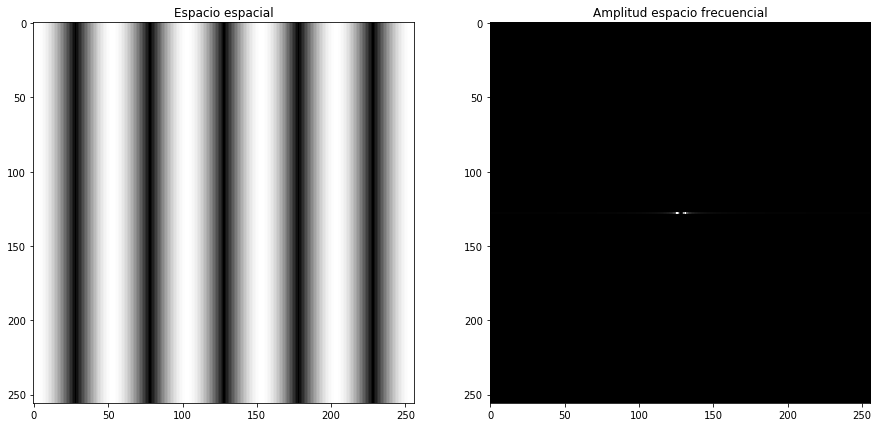

In [2]:
tam = 256 # tamaño matriz
dx = 0.01 # resolución (m/pixel)
x = np.arange(-dx*tam/2,dx*tam/2,dx) # coordenadas espaciales
X , Y = np.meshgrid(x,x) # espacio bidimensional

A1 = 1. # amplitud en unidades arbitrarias
f1 = 1. # frecuencia espacial (1/m) 
g1 = A1*np.sin(2*np.pi*f1*X) # Imagen en el espacio "espacial"

ftg1 = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(g1)))*dx**2 # Transformada de Fourier, espacio frecuencial

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(abs(g1), cmap='gray')
plt.title('Espacio espacial')
plt.subplot(1,2,2)
plt.imshow(abs(ftg1), cmap='gray')
plt.title('Amplitud espacio frecuencial')

Note que solo aparecen aproximadamente dos deltas de Dirac en el espacio frecuencial. De forma análoga al caso unidimensional esos dos puntos corresponden a la frecuencia del seno en el espacio espacial. Note también que los puntos salen en la dirección horizontal, indicando que la dirección del seno bidimensional es horizontal.
Finalmente, observe que en el centro de la imagen está el centro del origen (para matrices cuadradas esto no es del todo exacto), mientras que la posición (0,0) de la matriz está en la esquina superior-izquierda.

Ahora, grafiquemos la superposición de un seno horizontal y uno vertical de la misma frecuencia

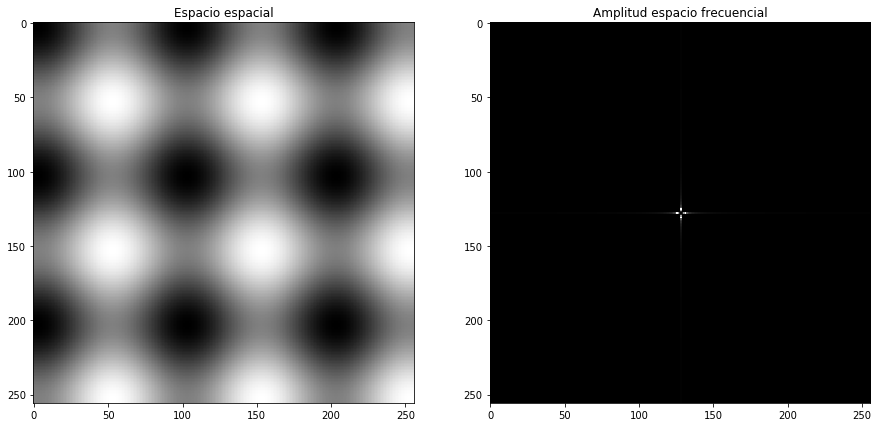

In [3]:
tam = 256 # tamaño matriz
dx = 0.01 # resolución (m/pixel)
x = np.arange(-dx*tam/2,dx*tam/2,dx) # coordenadas espaciales
X , Y = np.meshgrid(x,x) # espacio bidimensional

A1 = 1. # amplitud en unidades arbitrarias
f1 = 1. # frecuencia espacial (1/m) 
gx = A1*np.sin(2*np.pi*f1*X) # Seno en la dirección horizontal
gy = A1*np.sin(2*np.pi*f1*Y) # Seno en la dirección vertical

g = gx + gy # Superposición

ftg = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(g)))*dx**2 # Transformada de Fourier, espacio frecuencial

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(g, cmap='gray')
plt.title('Espacio espacial')
plt.subplot(1,2,2)
plt.imshow(abs(ftg), cmap='gray')
plt.title('Amplitud espacio frecuencial')

Observe que ahora aparecen unas deltas en la dirección vertical que dan cuenta del seno en la dirección vertical.

Hagamos un último ejemplo incluyendo un coseno en la dirección diagonal que tiene una amplidut dos veces superior a los otros senos. Además, el seno en la dirección horizontal tiene una frecuencia dos veces mayor al coceno, y el seno en la dirección vertical 4 veces mayor.

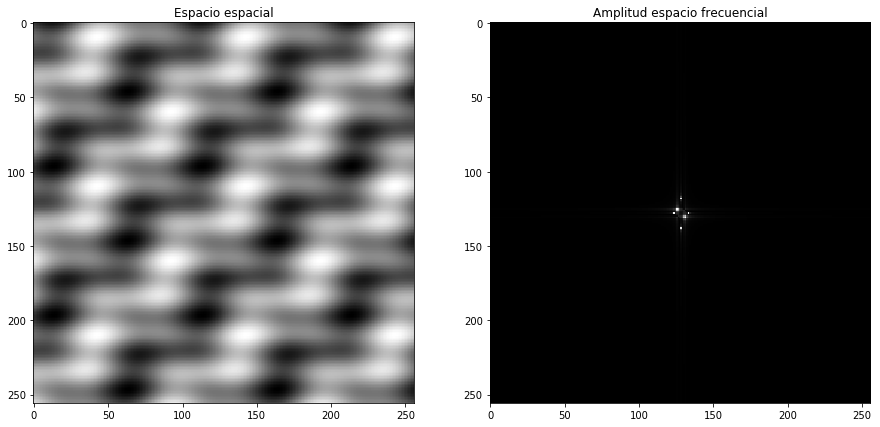

In [4]:
tam = 256 # tamaño matriz
dx = 0.01 # resolución (m/pixel)
x = np.arange(-dx*tam/2,dx*tam/2,dx) # coordenadas espaciales
X , Y = np.meshgrid(x,x) # espacio bidimensional

A1 = 1. # amplitud en unidades arbitrarias
f1 = 1. # frecuencia espacial (1/m) 
gx = A1*np.sin(2*np.pi*2*f1*X) # Seno en la dirección horizontal
gy = A1*np.sin(2*np.pi*4*f1*Y) # Seno en la dirección vertical
gd = 2*A1*np.cos(2*np.pi*f1*(X + Y)) # CCoceno en la dirección diagonal

g = gx + gy + gd # Superposición

ftg = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(g)))*dx**2 # Transformada de Fourier, espacio frecuencial

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(g, cmap='gray')
plt.title('Espacio espacial')
plt.subplot(1,2,2)
plt.imshow(abs(ftg), cmap='gray')
plt.title('Amplitud espacio frecuencial')

Como conclusión podemos decir que el espacio de la transformada de Fourier me da información de los senos y cocenos que necesito superponer para construir la imagen.